In [69]:
# Import the necessary libraries

# Data handling libraries
import pandas as pd          # For loading and manipulating tabular data
import numpy as np           # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Scikit-Learn modules for preprocessing and modeling
from sklearn.model_selection import train_test_split   # Train-test split
from sklearn.impute import SimpleImputer                # Handle missing values
from sklearn.preprocessing import OneHotEncoder         # Encode categorical data
from sklearn.preprocessing import StandardScaler        # Feature scaling
from sklearn.linear_model import LinearRegression        # Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Error Metrics

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [70]:
# Load housing dataset from CSV file. It is loaded as Dataframe
data = pd.read_csv('/content/sample_data/Housing.csv')

In [71]:
# Check the shape of the dataset (Rows, Columns)
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (545, 13)


In [72]:
# View basic information about columns (Non-null counts, Dtypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [73]:
# This will display all the Columns in the dataframe
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [74]:
# Preview the first few rows in the dataframe
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [75]:
# Preview the last few rows in the dataframe
data.tail(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [76]:
# To find the data type of the price column
data.dtypes['price']

dtype('int64')

In [77]:
# To find the mean, median, Standard Devitation of a Column using the Numpy library
print(f"Mean of area column : {np.mean(data['area'])}")
print(f"Median of area column : {np.median(data['area'])}")
print(f"Standard Devitation of area column : {np.std(data['area'])}")

# There is no function called mode in numpy. As mode is mainly used for Caterogrical columns to find the most repetative value.
#np.mode(data['guestroom'])

Mean of area column : 5150.54128440367
Median of area column : 4600.0
Standard Devitation of area column : 2168.1491533213048


In [78]:
# Check statistical summary for numerical columns
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [79]:
# Check summary for categorical columns (unique values, frequency)
data.describe(include="object")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [80]:
# Check for null values across columns
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [81]:
# Remove duplicates if any exist
data.duplicated().sum()
data = data.drop_duplicates()

In [82]:
# For numerical columns, fill missing values with the Mean
data["area"] = data["area"].fillna(data["area"].mean())
data.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [83]:
# For categorical columns, fill missing with the Mode (most frequent)
# .mode()[0] grabs the first mode value found
data["airconditioning"] = data["airconditioning"].fillna(data["airconditioning"].mode()[0])
data.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [84]:
# You can drop columns if it is not required. Coumns like Unique ID, Role number etc.
# There is not unique id column in this dataset.
#data = data.drop(columns=['column_name'], errors='ignore')
#data.columns

In [85]:
# To see all the unique values in a particular column
data["bedrooms"].unique()

array([4, 3, 5, 2, 6, 1])

In [86]:
# To find number of unique values in all the Columns.
data.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [87]:
# To check the Correlation between the numerical columns
data.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


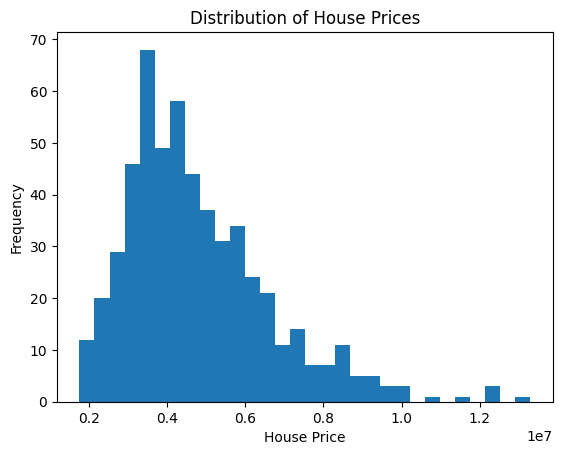

In [88]:
# 1. Histogram - Helps to find Skewness and Outliers
plt.hist(data['price'], bins=30)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

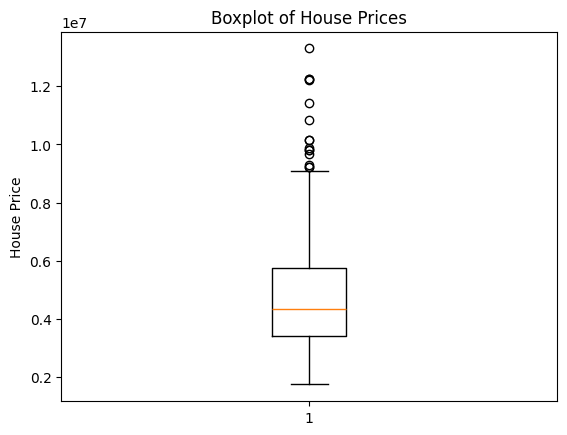

In [89]:
# 2. Boxplot (Good for spotting outliers)
plt.boxplot(data['price'])
plt.ylabel("House Price")
plt.title("Boxplot of House Prices")
plt.show()

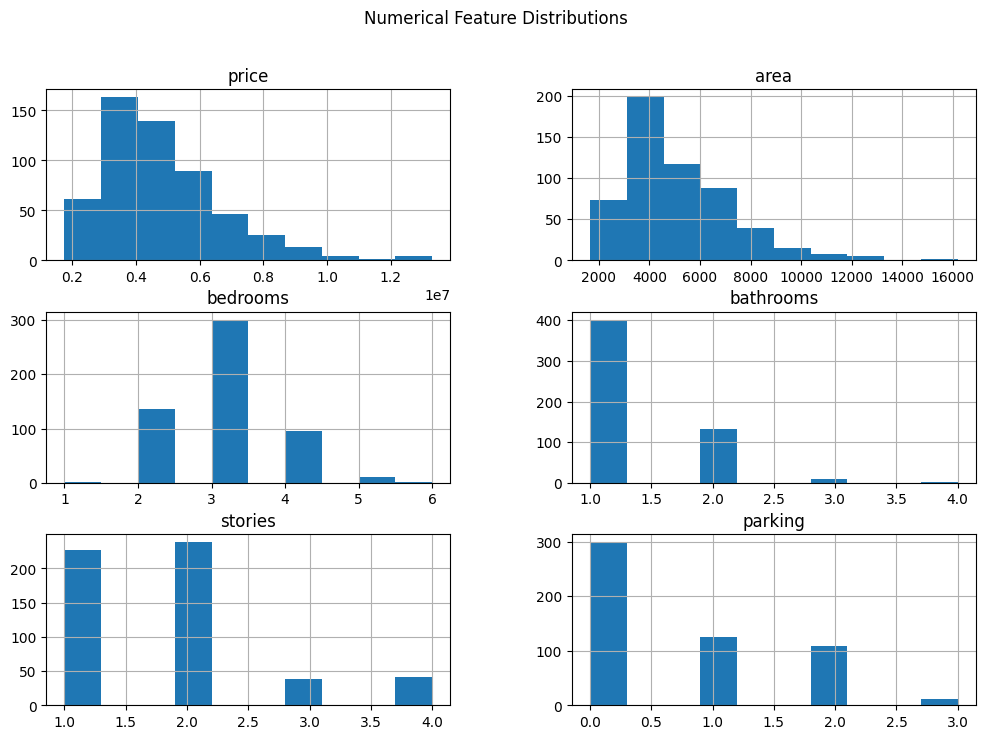

In [90]:
# Histogram for all the numerical values
data[num_cols].hist(figsize=(12,8))
plt.suptitle("Numerical Feature Distributions")
plt.show()

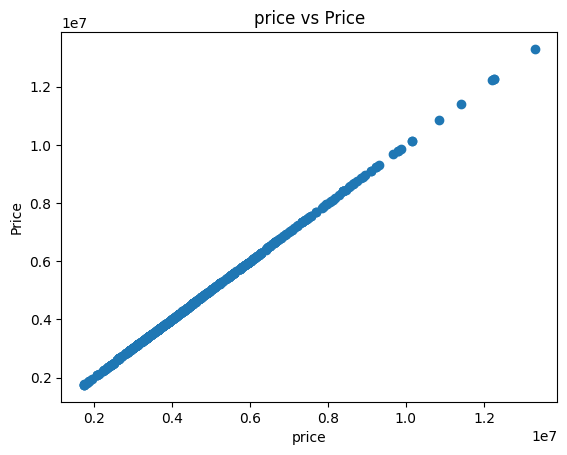

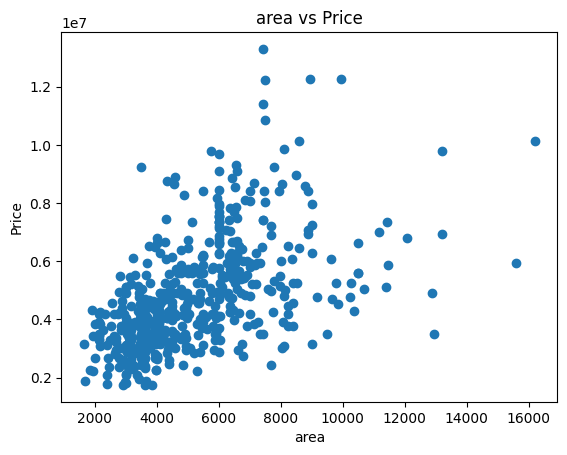

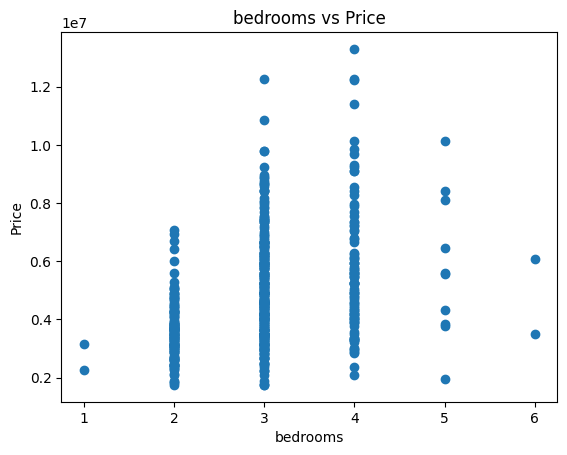

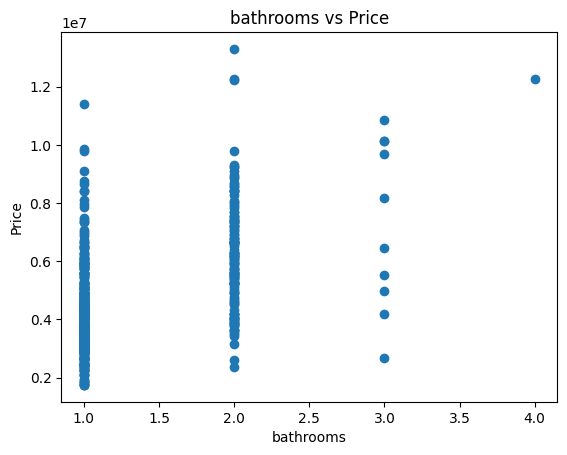

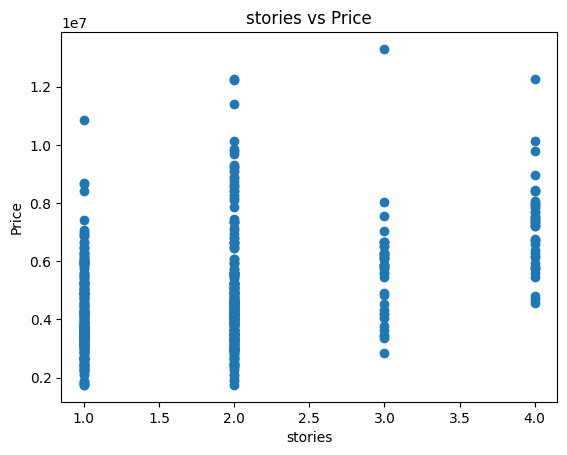

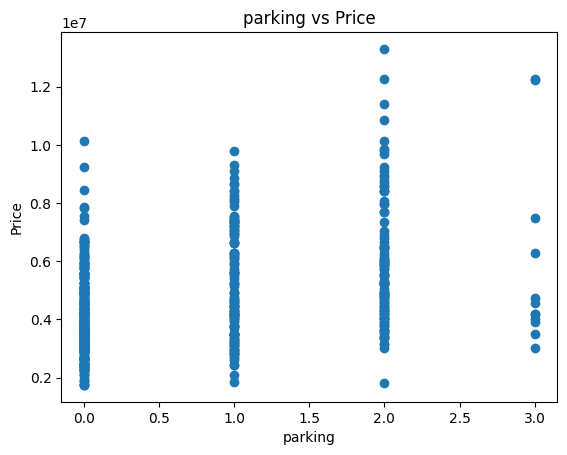

In [91]:
# Scaterred plot for all the numerical colomns
for col in num_cols:
    plt.scatter(data[col], data['price'])
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"{col} vs Price")
    plt.show()

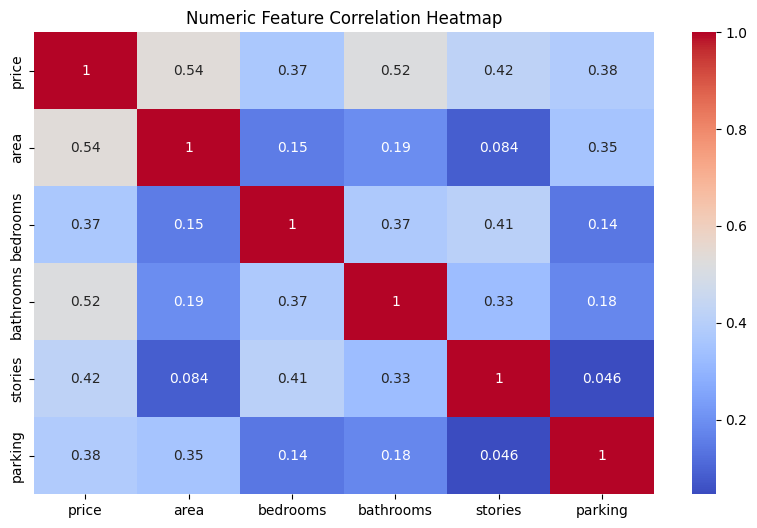

In [92]:
# Separate columns into Numerical and Categorical lists
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

# Calculate correlation matrix
corr_matrix = data[num_cols].corr()

# Plot Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

In [93]:
#Spliting the Columns into X and y. Independent columns into X and dependent column into y.
# price is the target value.
X = data.drop(columns=['price'], axis=1)
y = data['price']

In [94]:
# Split data into training and testing sets.
# Split: 80% Training, 20% Testing
# random_state ensures reproducibility
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
# Check the shape of the each cateory
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((436, 12), (109, 12), (436,), (109,))

In [96]:
train_cat_cols = train_X.select_dtypes(include='object').columns
train_num_cols = train_X.select_dtypes(exclude='object').columns

In [97]:
# Handle Numerical Columns

# Impute missing values using mean
num_imputer = SimpleImputer(strategy='mean')
train_X_num = num_imputer.fit_transform(train_X[train_num_cols])
test_X_num = num_imputer.transform(test_X[train_num_cols])

# Scale numerical features
scaler = StandardScaler()
train_X_num_scaled = scaler.fit_transform(train_X_num)
test_X_num_scaled = scaler.transform(test_X_num)


In [98]:
# Categorical Features

# Impute missing categorical values using most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
train_X_cat = cat_imputer.fit_transform(train_X[train_cat_cols])
test_X_cat = cat_imputer.transform(test_X[train_cat_cols])

# One-hot encode categorical features
# handle_unknown='ignore' allows the model to handle new categories in test data gracefully
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
train_X_cat_enc = encoder.fit_transform(train_X_cat)
test_X_cat_enc  = encoder.transform(test_X_cat)

In [99]:
# Concatenate processed features back together
train_X_final = np.concatenate([train_X_num_scaled, train_X_cat_enc], axis=1)
test_X_final = np.concatenate([test_X_num_scaled, test_X_cat_enc], axis=1)

In [100]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the processed training data
linear_model.fit(train_X_final, train_y)

LinearRegression()

In [101]:
# Generate predictions on the test set
linear_predict = linear_model.predict(test_X_final)

# Calculate Metrics
mae = mean_absolute_error(test_y, linear_predict)
mse = mean_squared_error(test_y, linear_predict)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, linear_predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 970043.4039201644
Mean Squared Error: 1754318687330.6682
Root Mean Squared Error: 1324506.9600914402
R-squared: 0.6529242642153175


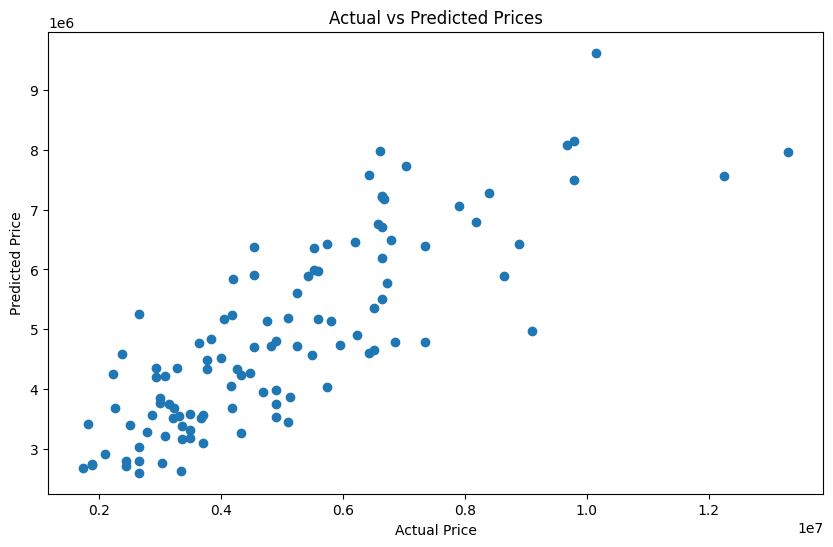

In [102]:
# Draw a scatter plot for y and predicted y. Display Actaul and predicted in different colors
plt.figure(figsize=(10,6))
plt.scatter(test_y, linear_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

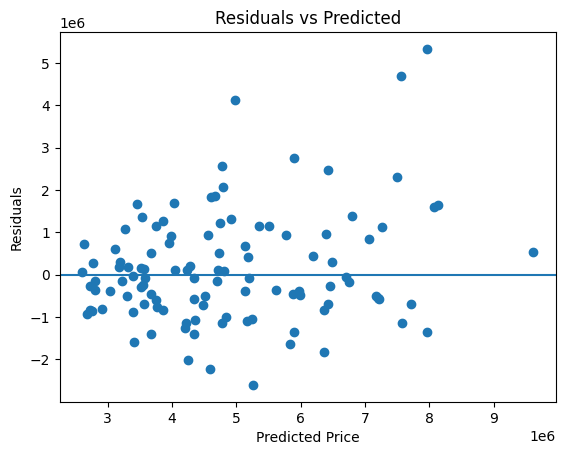

In [111]:
# Plot residuals (Actual - Predicted). A good model should have residuals randomly scattered around zero.

residuals = test_y - linear_predict

plt.scatter(linear_predict, residuals)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

In [108]:
linear_model.coef_

array([ 519552.41633999,   57349.55941862,  521879.02774805,
        349251.43890557,  192005.95366749, -183959.97383979,
        183959.97383979, -115805.01858782,  115805.01858782,
       -195125.58809055,  195125.58809055, -342324.9426694 ,
        342324.9426694 , -395713.36792159,  395713.36792159,
       -314945.28265668,  314945.28265668,  180175.62660444,
         53293.80901933, -233469.43562378])

In [109]:
linear_model.intercept_

np.float64(5337102.103750265)

# Linear Regression Equation:
**Y = mX + b**

**m (Slope / Coefficient / Weight)** → how much Y changes when X changes (line rotates/moves)

**b (Intercept / Bias / Constant)** → value of Y when X = 0 (where the line cuts the Y-axis)

**X → **Input / Predictive / Independent variable

**Y →** Output / Response / Dependent variable

*Another representation (Y = X * coef_ + intercept_)*